# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import os
baseDir = os.getcwd()
#print(os.getcwd())

import numpy as np

# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
dataDir = os.path.join(baseDir,'traffic-signs-data')
training_file = os.path.join(dataDir, 'train.p')
testing_file = os.path.join(dataDir, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# Print some information about the images and the datasets

print("Image Shape:  {}".format(X_train[0].shape))
print("Training Set: {} samples".format(len(X_train)))
print("Test Set:     {} samples".format(len(X_test)))
print("Labels in test set: {}".format(np.unique(y_test)))
print("Number of unique labels in training set: {}".format(len(np.unique(y_train))))

Image Shape:  (32, 32, 3)
Training Set: 39209 samples
Test Set:     12630 samples
Labels in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Number of unique labels in training set: 43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

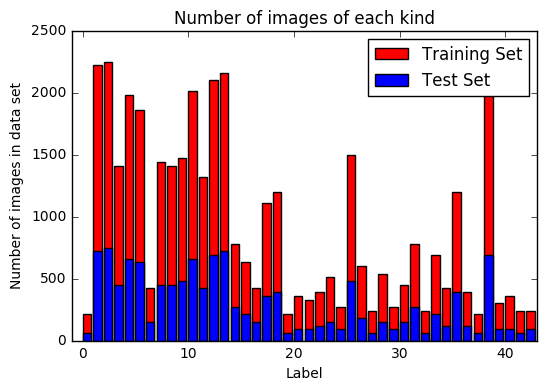

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#print(np.unique(y_train, return_counts=True))
labelsTrain=np.unique(y_train, return_counts=True)
labelsTest=np.unique(y_test, return_counts=True)

#print(labelsTable[1])
fig, ax = plt.subplots()
fig1 = ax.bar(labelsTrain[0],labelsTrain[1], color='r')
fig2 = ax.bar(labelsTest[0],labelsTest[1])

ax.set_title('Number of images of each kind')
ax.set_ylabel('Number of images in data set')
ax.set_xlabel('Label')
ax.set_xlim([-1,43])

ax.legend((fig1[0], fig2[0]), ('Training Set', 'Test Set'))

In [4]:
import csv
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    labels_list = list(map(tuple, reader))
    #remove first tuple which is only a header
    labels_list = labels_list[1:]
    labels_dict = {k:v for k,v in labels_list}
    named_y_train = [labels_dict[str(y)] for y in set(y_train)]

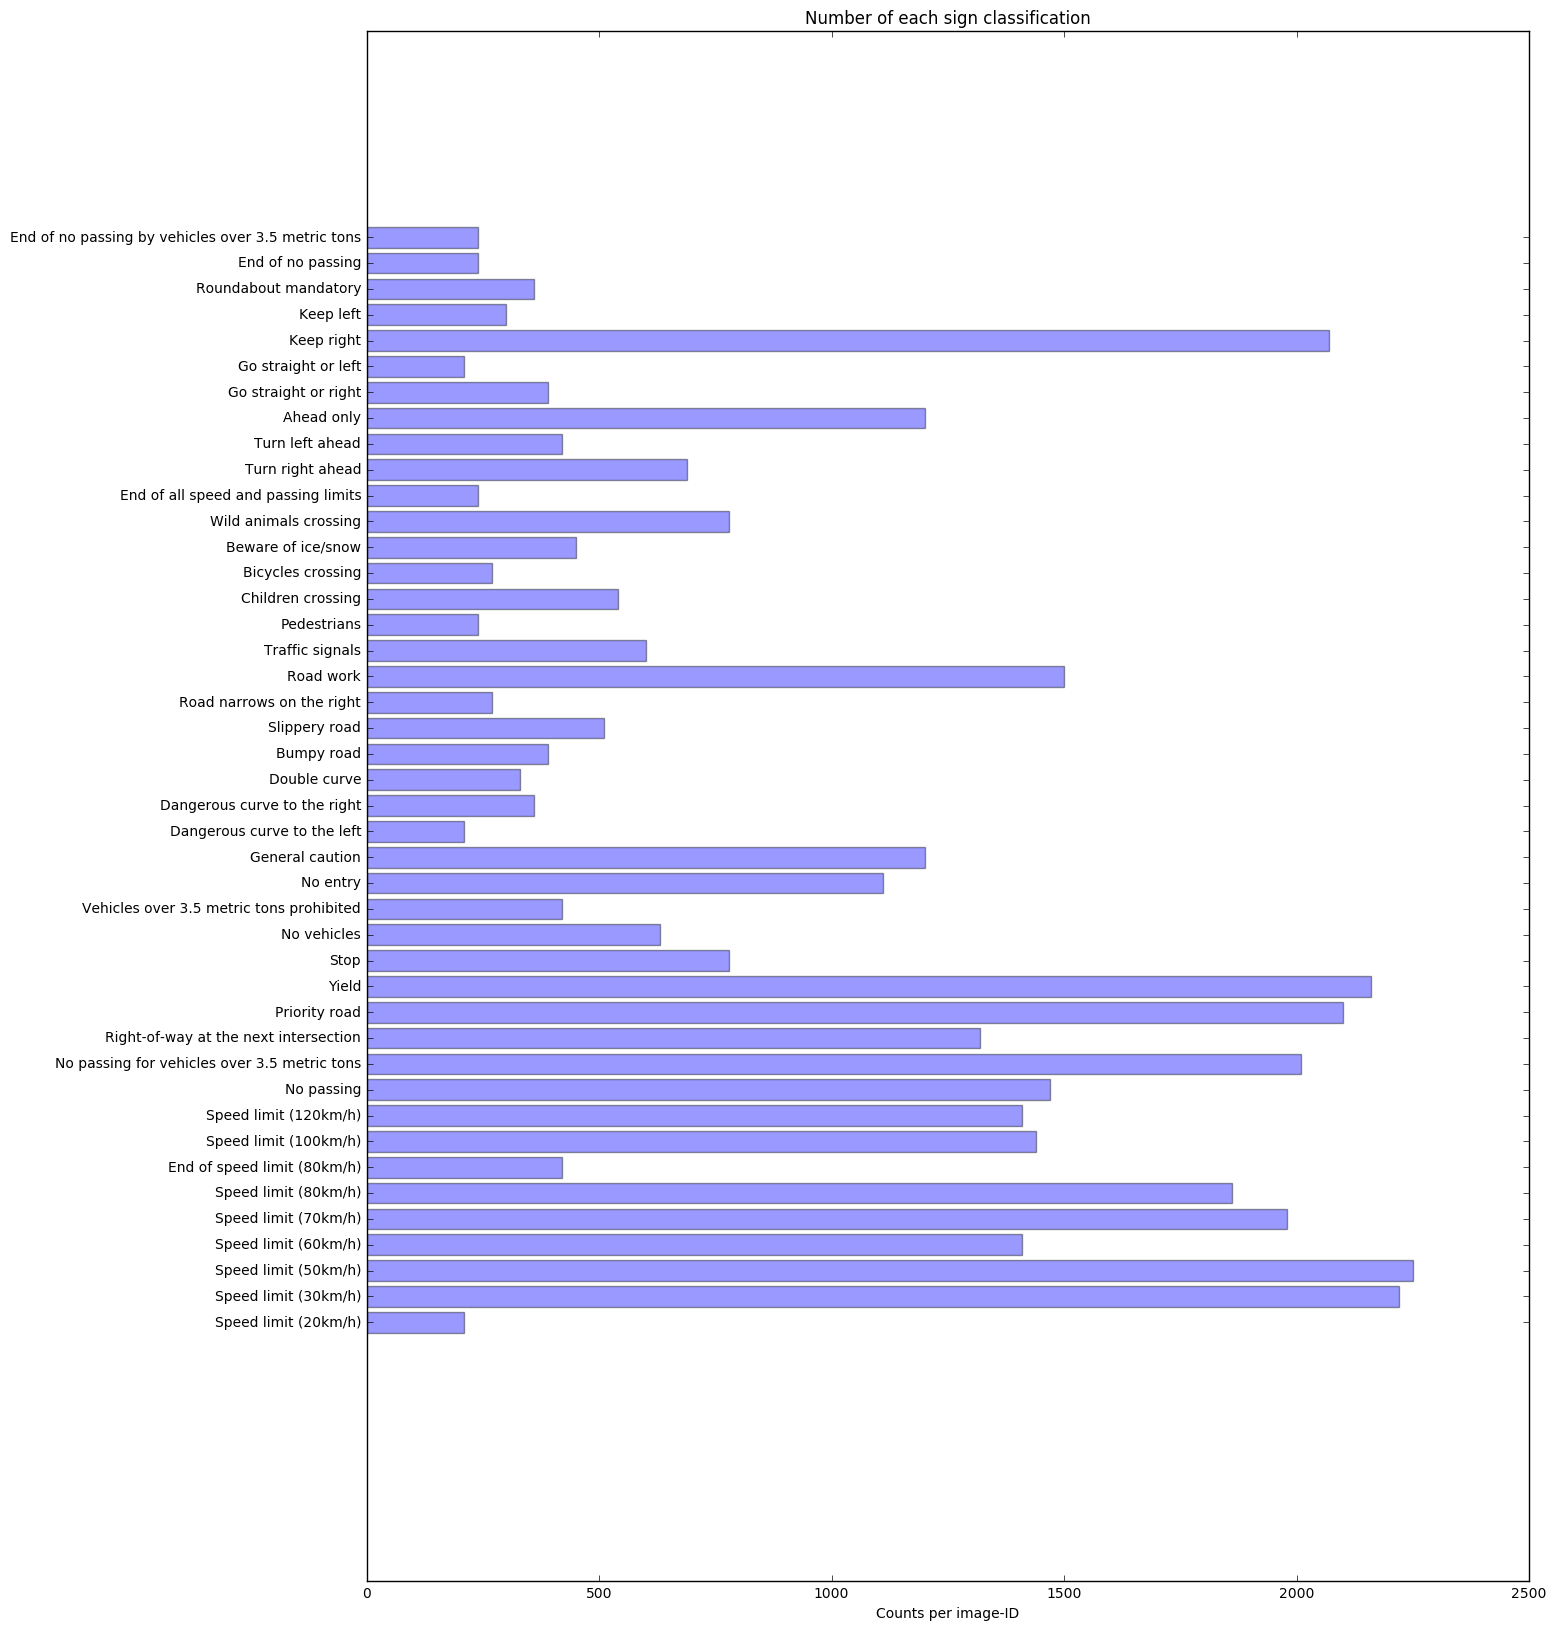

In [5]:
plt.rcParams["figure.figsize"] = (15.0, 20.0)

# get the counts for each key, assuming the values are numerical
y_pos,signCounts = np.unique(y_train, return_counts = True)

#map label numbers to values in CSV
#BarH plots count of each sign
plt.barh(y_pos, signCounts, align='center', alpha=0.4)
plt.yticks(y_pos, named_y_train)
plt.xlabel('Counts per image-ID')
plt.title('Number of each sign classification')

plt.show()

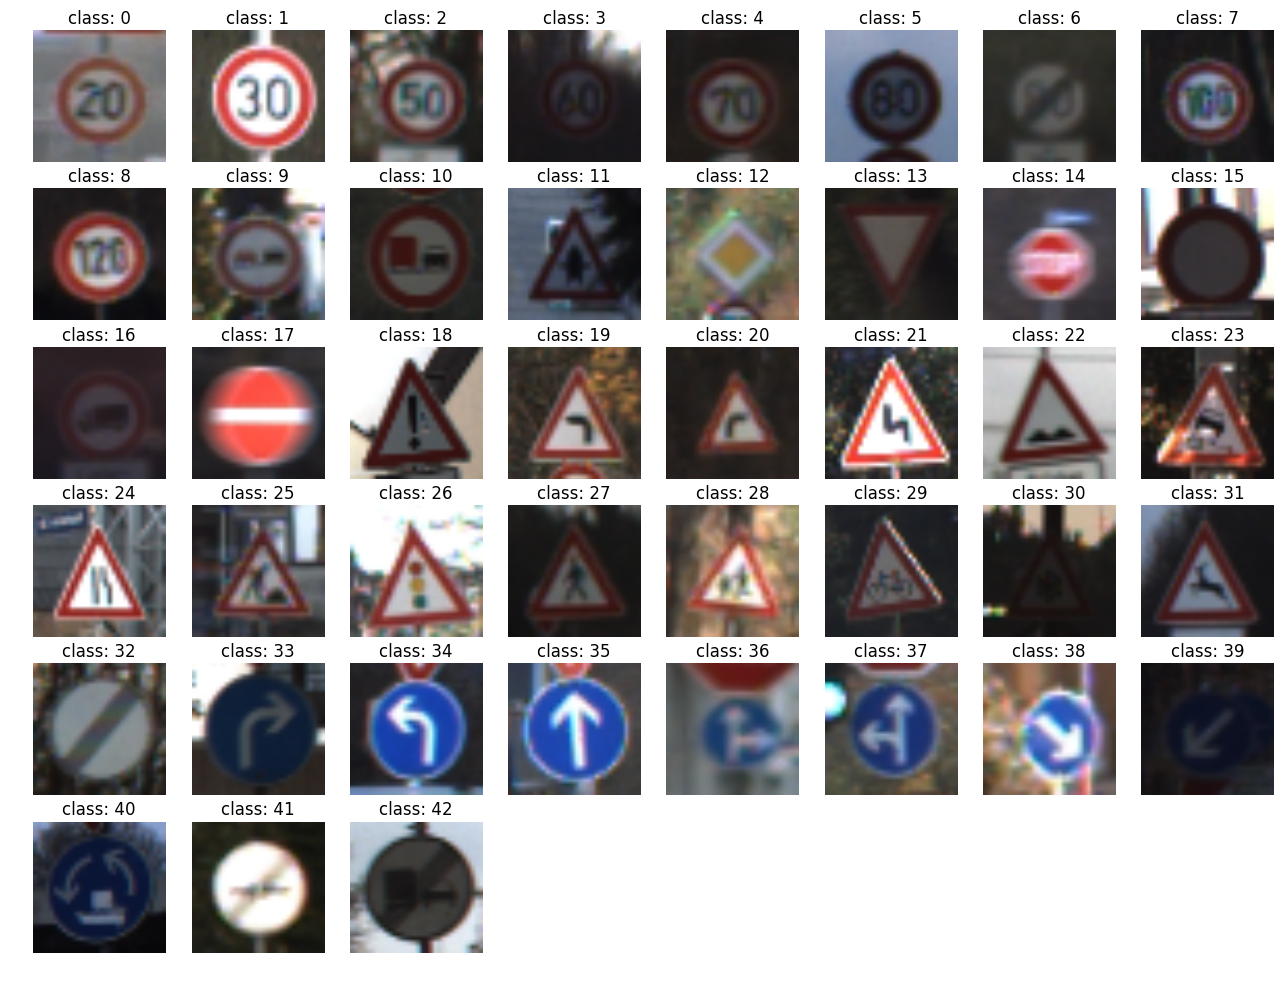

In [6]:
plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = random.choice(np.where(y_train == c)[0])
    plt.subplot(8, 8, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(X_train[i])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
# Shuffle the training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [8]:
'''
def normalize_image(image_data):
    lmin = float(image_data.min())
    lmax = float(image_data.max())
    return (image_data - np.mean(image_data)) / (lmax-lmin)
'''

'\ndef normalize_image(image_data):\n    lmin = float(image_data.min())\n    lmax = float(image_data.max())\n    return (image_data - np.mean(image_data)) / (lmax-lmin)\n'

In [9]:
'''
X_train = normalize_image(X_train)
    
X_test = normalize_image(X_test)
'''

'\nX_train = normalize_image(X_train)\n    \nX_test = normalize_image(X_test)\n'

In [10]:
'''
index = random.randint(0, len(X_train))
image = X_train[index]

plt.figure(figsize=(1,1))
#plt.figure(frameon=False)
plt.axis('off')
plt.imshow(image)
print(y_train[index])
print(image.shape)
plt.savefig('14.png')
'''

"\nindex = random.randint(0, len(X_train))\nimage = X_train[index]\n\nplt.figure(figsize=(1,1))\n#plt.figure(frameon=False)\nplt.axis('off')\nplt.imshow(image)\nprint(y_train[index])\nprint(image.shape)\nplt.savefig('14.png')\n"

In [11]:
'''
plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = random.choice(np.where(y_train == c)[0])
    plt.subplot(8, 8, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(X_train[i])
'''

"\nplt.figure(figsize=(16, 16))\nfor c in range(n_classes):\n    i = random.choice(np.where(y_train == c)[0])\n    plt.subplot(8, 8, c+1)\n    plt.axis('off')\n    plt.title('class: {}'.format(c))\n    plt.imshow(X_train[i])\n"

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I tried various techniques like - 
1. Converting to Grayscale - In order to reduce the amount of data to be processed and simplify the image processing operation a bit. However, I think the color forms an important aspect of Traffic Signs and hence I was getting slightly worse results with this.
2. Min-Max Normalization - I felt having a wider distribution in the data would make it more difficult to train using a singlar learning rate. Different features could encompass far different ranges and a single learning rate might make some weights diverge.
3. Normalizing the data to values between 0.1 to 0.9 - Because brightness and contrast of the input images are not constant. I thought this would make learning easier to proceed.

I found that I got the best results when I used the original images without any image conversions, so I have used the original images for training.

In [12]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
test_features, valid_features, test_labels, valid_labels = train_test_split(X_test,y_test,
                                                                                    test_size=0.60,
                                                                                    random_state=42)
print("Number of validation examples =", len(valid_labels))
print("Number of testing examples =", len(test_labels))

Number of validation examples = 7578
Number of testing examples = 5052


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The test data which is more than 12,000 seems to be enough, but there was no validation data. CNN needs the validation data to check trainig status. So I shuffled the training data randomly and generated the validation data from 60% of the test data.

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 25
BATCH_SIZE = 128
DROPOUT_KEEP_PROB = 0.25

In [14]:
from tensorflow.contrib.layers import flatten

def Conv_Net(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.01
    init_value = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,12), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.truncated_normal(shape=[12], mean=mu, stddev=sigma))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x12. Output = 12x12x36.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3,3,12,36), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.truncated_normal(shape=[36], mean=mu, stddev=sigma))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 12x12x36. Output = 6x6x36.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Fully connected layer - 6x6x36 to 1296
    # Reshape conv3 output to fit fully connected layer input
    '''
    num_fc0 = 2304
    fc0_W = tf.Variable(tf.truncated_normal(shape=[6*6*64, num_fc0], mean = mu, stddev = sigma))
    fc0_b = tf.Variable(tf.constant(init_value, shape=[num_fc0]))
        
    fc0 = tf.reshape(conv2, [-1, fc0_W.get_shape().as_list()[0]])
    fc0 = tf.add(tf.matmul(fc0, fc0_W), fc0_b)
    fc0 = tf.nn.relu(fc0)
    '''
    # Flatten. Input = 6x6x36. Output = 1296.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1296. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1296,512), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.truncated_normal(shape=[512], mean=mu, stddev=sigma))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 512. Output = 128.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(512,128), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.truncated_normal(shape=[128], mean=mu, stddev=sigma))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    #Dropout to avoid overfitting
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 128. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(128,43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.truncated_normal(shape=[43], mean=mu, stddev=sigma))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I started with the LeCun network and gradually increased the filters (first) and later added more layers to get better results.

A CNN consists of a succession of convolutional and maxpooling layers, and each layer only receives connections from its previous layer. The last layer is a fully connected layer with one output unit per class in the recognition task.

Hidden layers are:

    Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    Layer 2: Max Pooling. Input = 28x28x12. Output = 14x14x12.
    Layer 3: Convolutional. Input = 14x14x12. Output = 12x12x36.
    Layer 4: Max Pooling. Input = 12x12x36. Output = 6x6x36.
    Layer 5: Fully Connected. Input = 1296. Output = 512.
    Layer 6: Fully Connected. Input = 512. Output = 128.
    Layer 7: Fully Connected. Input = 128. Output = 43.

I tried with with various `keep_prob` for dropout as well, like 1.0, 0.5, 0.25 and 0.2.

In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

In [16]:
# Training Pipeline
rate = 0.001

logits = Conv_Net(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    return (total_accuracy / num_examples, total_loss / num_examples)

In [19]:
plot_train_loss = []
plot_valid_loss = []
plot_train_acc = []
plot_valid_acc = []

In [20]:
# Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        total_loss = 0
        total_accuracy = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT_KEEP_PROB})
            a, l = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            #sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            #a, l = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (a * len(batch_x))
            total_loss += (l * len(batch_x))
            
        train_accuracy = total_accuracy / num_examples
        train_loss = total_loss / num_examples
        
        plot_train_acc.append(train_accuracy)
        plot_train_loss.append(train_loss)
            
        (validation_accuracy, validation_loss) = evaluate(valid_features, valid_labels)
        
        plot_valid_acc.append(validation_accuracy)
        plot_valid_loss.append(validation_loss)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print()
        
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'models/trafficSign')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.507
Validation Loss = 1.512

EPOCH 2 ...
Validation Accuracy = 0.763
Validation Loss = 0.791

EPOCH 3 ...
Validation Accuracy = 0.864
Validation Loss = 0.529

EPOCH 4 ...
Validation Accuracy = 0.893
Validation Loss = 0.427

EPOCH 5 ...
Validation Accuracy = 0.901
Validation Loss = 0.491

EPOCH 6 ...
Validation Accuracy = 0.920
Validation Loss = 0.405

EPOCH 7 ...
Validation Accuracy = 0.925
Validation Loss = 0.366

EPOCH 8 ...
Validation Accuracy = 0.932
Validation Loss = 0.385

EPOCH 9 ...
Validation Accuracy = 0.940
Validation Loss = 0.390

EPOCH 10 ...
Validation Accuracy = 0.932
Validation Loss = 0.391

EPOCH 11 ...
Validation Accuracy = 0.921
Validation Loss = 0.504

EPOCH 12 ...
Validation Accuracy = 0.931
Validation Loss = 0.477

EPOCH 13 ...
Validation Accuracy = 0.940
Validation Loss = 0.441

EPOCH 14 ...
Validation Accuracy = 0.935
Validation Loss = 0.458

EPOCH 15 ...
Validation Accuracy = 0.927
Validation Loss = 0.494

EPOCH 

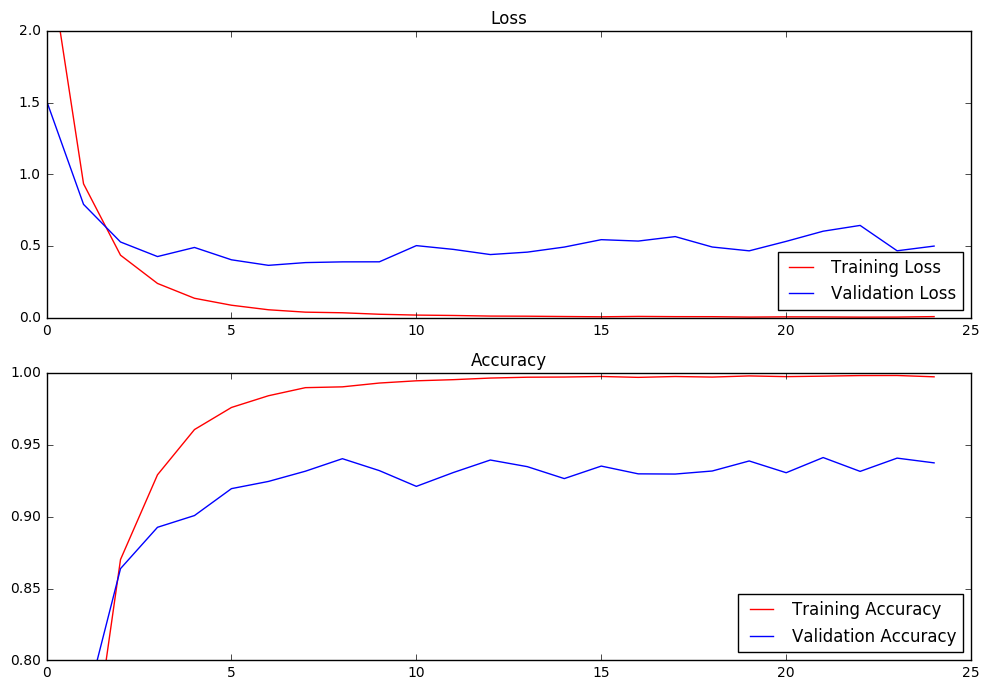

In [21]:
### Visualize training progress
plt.rcParams["figure.figsize"] = (10.0, 7.0)
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(range(0, len(plot_train_loss)), plot_train_loss, 'r', label='Training Loss')
loss_plot.plot(range(0, len(plot_train_loss)), plot_valid_loss, 'b', label='Validation Loss')
loss_plot.set_ylim([0.0, 2.0])
loss_plot.legend(loc=4)
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(range(0, len(plot_train_loss)), plot_train_acc, 'r', label='Training Accuracy')
acc_plot.plot(range(0, len(plot_train_loss)), plot_valid_acc, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0.8, 1.0])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

In [22]:
# Evaluate the Model
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('models/trafficSign.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    (test_accuracy, test_loss) = evaluate(test_features, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Loss = {:.3f}".format(test_loss))

Test Accuracy = 0.948
Test Loss = 0.383


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- First I tried with GradientDescentOptimizer. I was not able to get a very good accuracy with this. Then I changed to AdamOptimizer. I got a very good increase in accuracy with it.
- I tried with different epochs, 10, 15, 20, 25, 50. The results were more or less same after 25.
- Initially I went with 256 as the batch size and then experimented with lower sizes of 128 and 64. Finally I decided to go with 128 after looking at the accuracy and compute time tradeoff
- I also changed the value of sigma from 0.1 to 0.01 and got a slight improvement in accuracy.
- I reduced the learning rate to 0.001
- Dropout's keep_prob was set to 0.25 after a few trial runs
- I also initialized the biases to random numbers with mean of 0 and sd of 0.01 instead to 0 to speed up the process of getting a reasonable accuracy a little bit.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
There was a lot of trial and error. I started with the LeNet(5) network, as it was both suggested and was the logical choice to go for an image classifying network.

I gradually increased the number of filters to make the model learn more complex patterns. Later I changed the initial values of biases from 0 to small random numbers. 

I was getting a big difference in the training and test accuracies so I experimented with various dropout probablities to reduce overfitting. 

Initially, I had also tried with various image prcessing techniques, but the accuracy seemed to be the best when I used the original images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

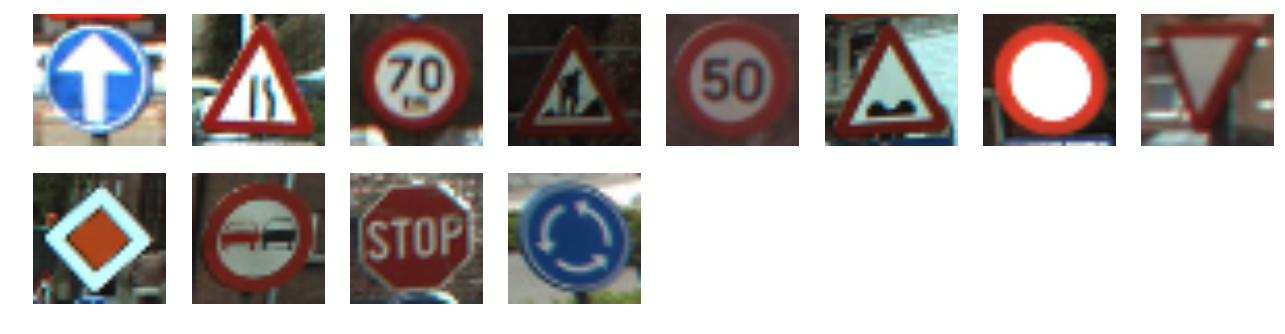

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os, fnmatch
import matplotlib.image as mpimg

new_images = np.empty(shape=(0, 32, 32, 3), dtype=np.uint8)
for image in fnmatch.filter(os.listdir('./new_images_org'), '*.ppm'):
    new_images = np.concatenate((new_images, [cv2.resize(mpimg.imread('./new_images_org/'+image), (32,32))]))
    
plt.figure(figsize=(16, 16))
for i in range(len(new_images)):
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.imshow(new_images[i])

new_labels = np.array([35,24,4,25,2,22,15,13,12,17,14,40])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I had to go through a lot of efforts to get the model images with the correct dimensions. Finally I have used 12 images as test images. These images are at different angles and with different backgrounds to make the task more realistic.

The images are also of different signs to check multiple classes.

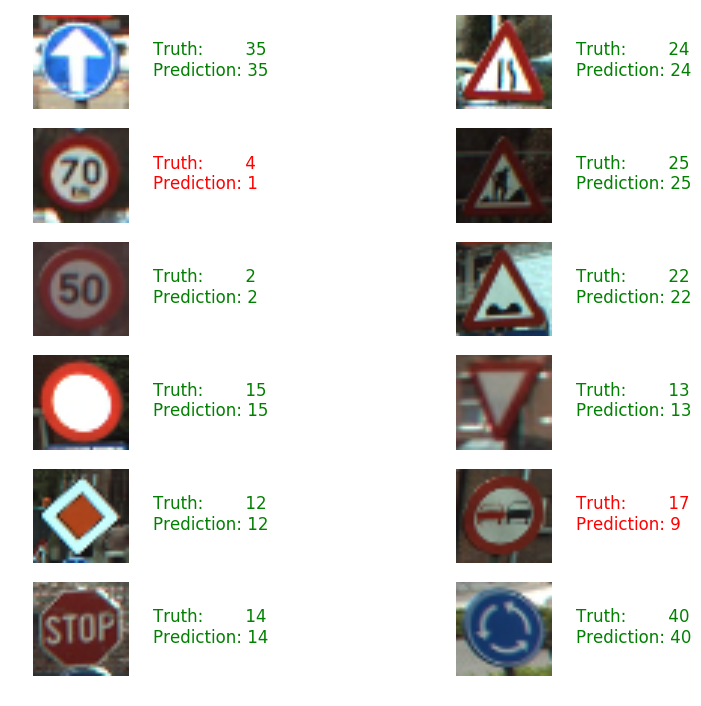

In [24]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
#saver2 = tf.train.Saver()
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('models/trafficSign.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    #saver2.restore(sess, 'models/trafficSign.meta')
    predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: new_images, y: new_labels, keep_prob: 1.})
            
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(new_images)):
        truth = new_labels[i]
        prediction = predictions[i]
        plt.subplot(7, 2,1+i)
        plt.axis('off')
        color = 'green' if truth == prediction else 'red'
        plt.text(40, 20, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
                 fontsize=12, color=color)
        plt.imshow(new_images[i])

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model was able to correctly classify 10 images out of 12. So the accuracy is around 83.33% on the new data. The accuracy in the test set was around 94.8%.

One of the reasons for this difference could be because the test set had more than 5000 examples while the new images were far less. Maybe with a higher number of images with different kinds the accuracies would be closer.

Also the accuracies on the test and validation sets seems very close at around 94%. This implies that there is not much overfitting in the model which I think is a good characteristic.

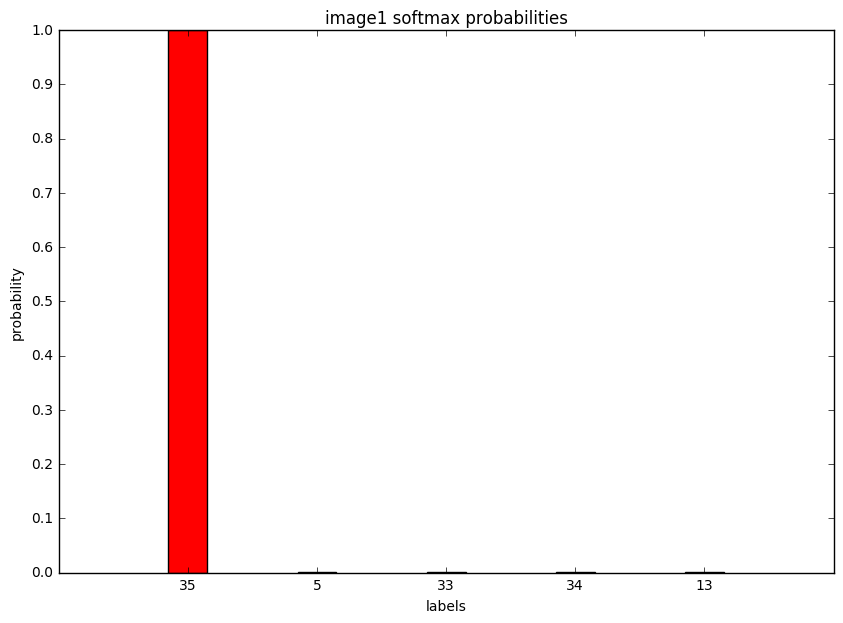

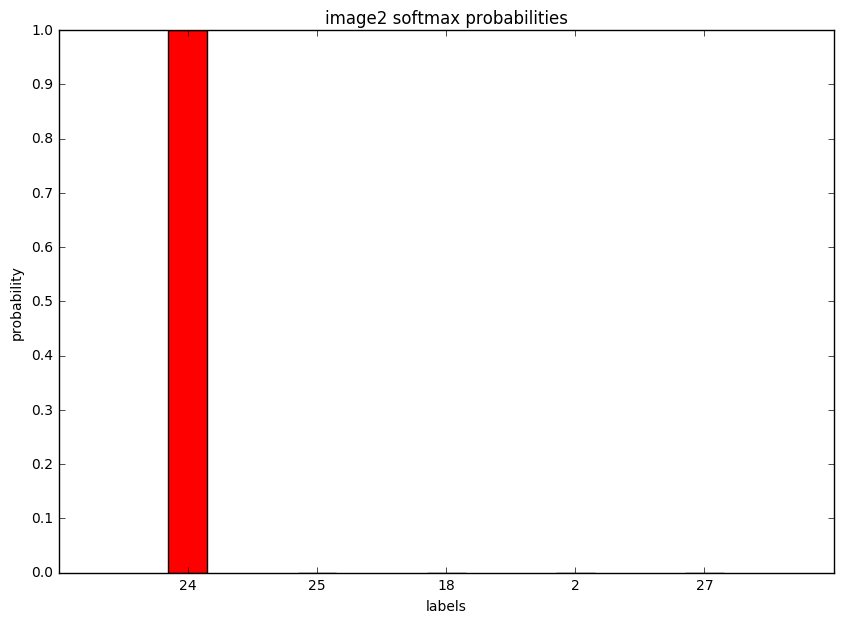

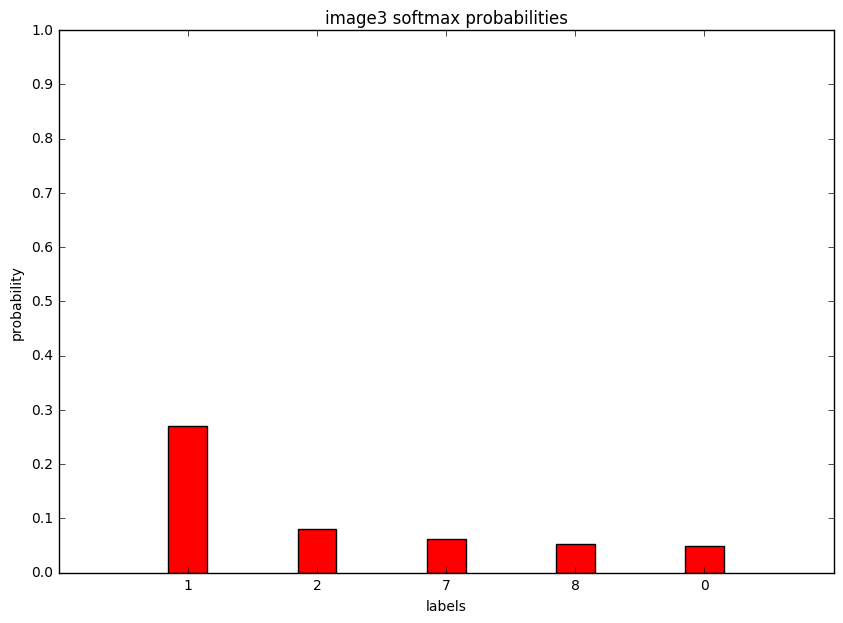

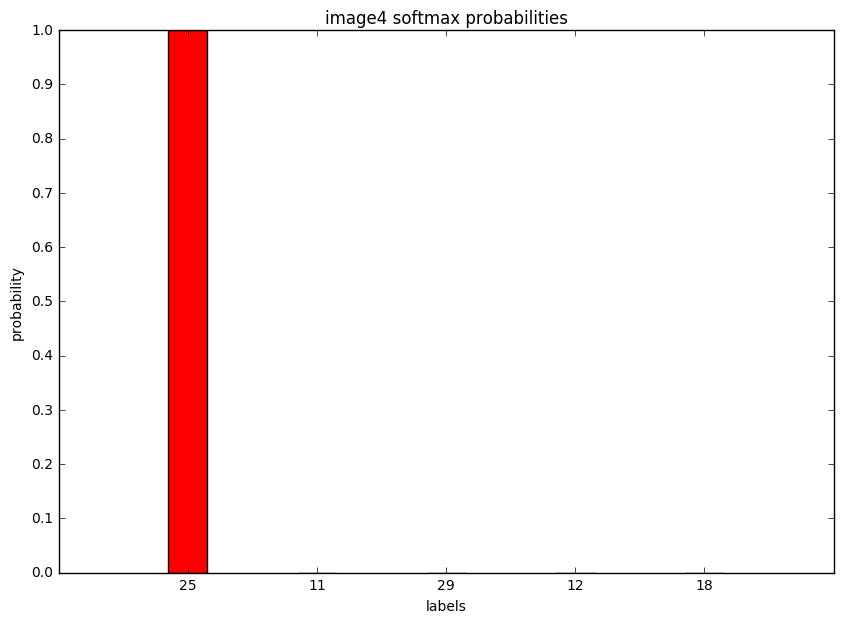

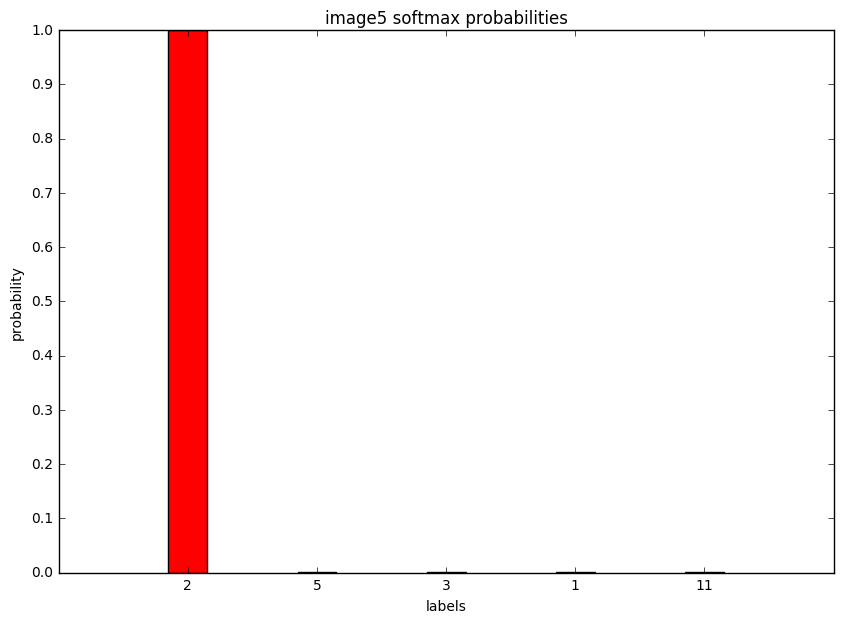

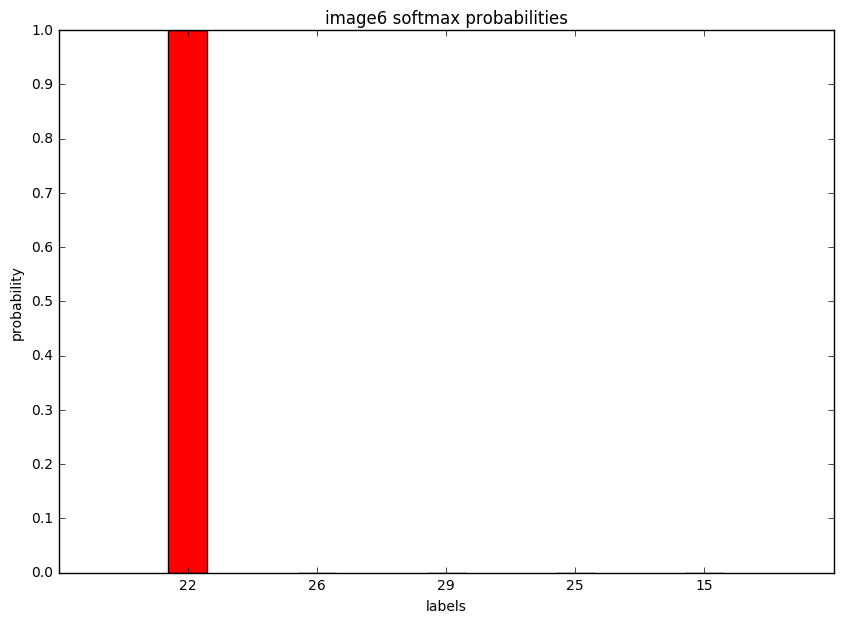

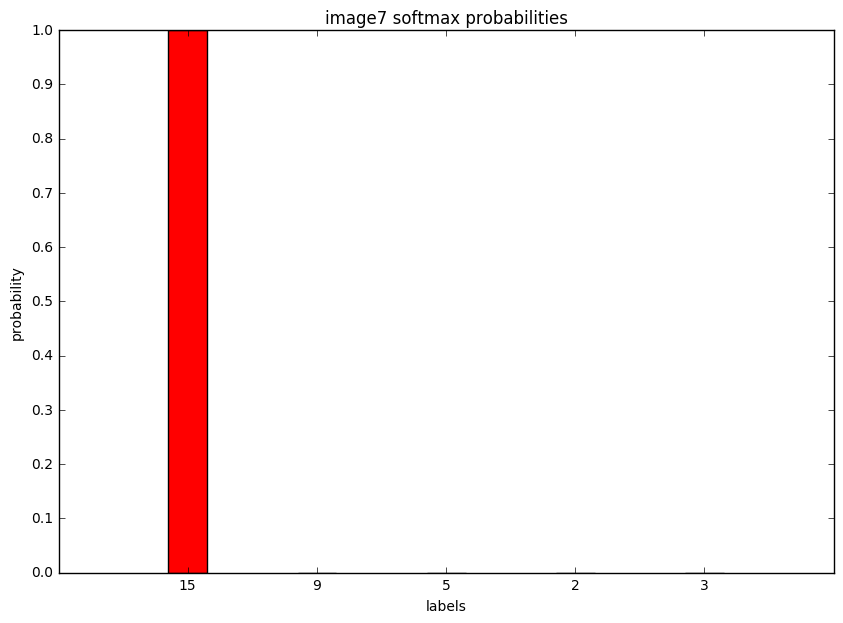

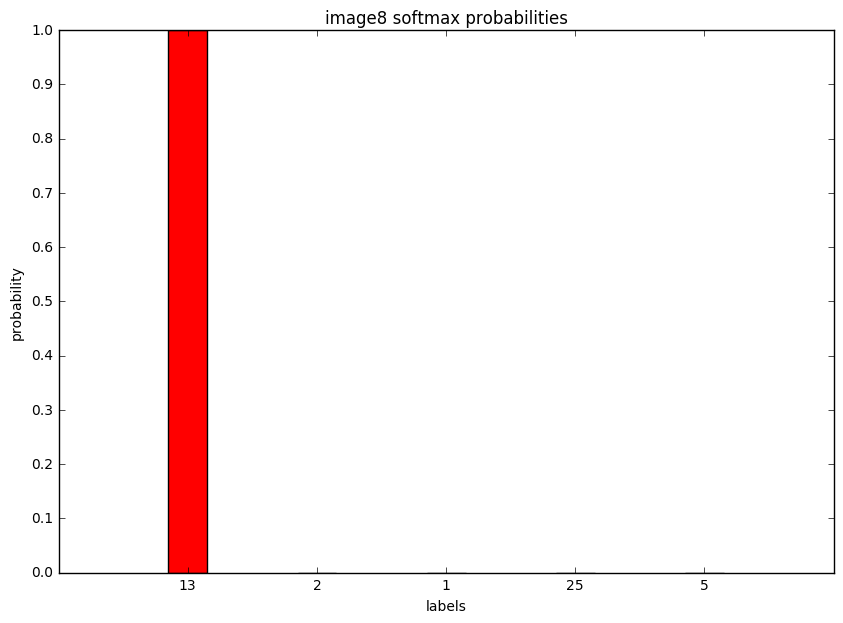

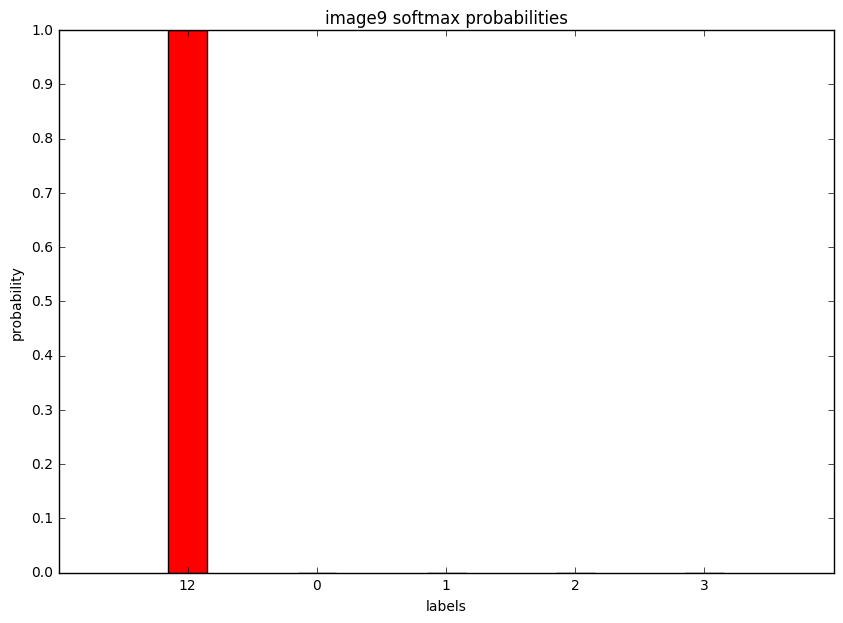

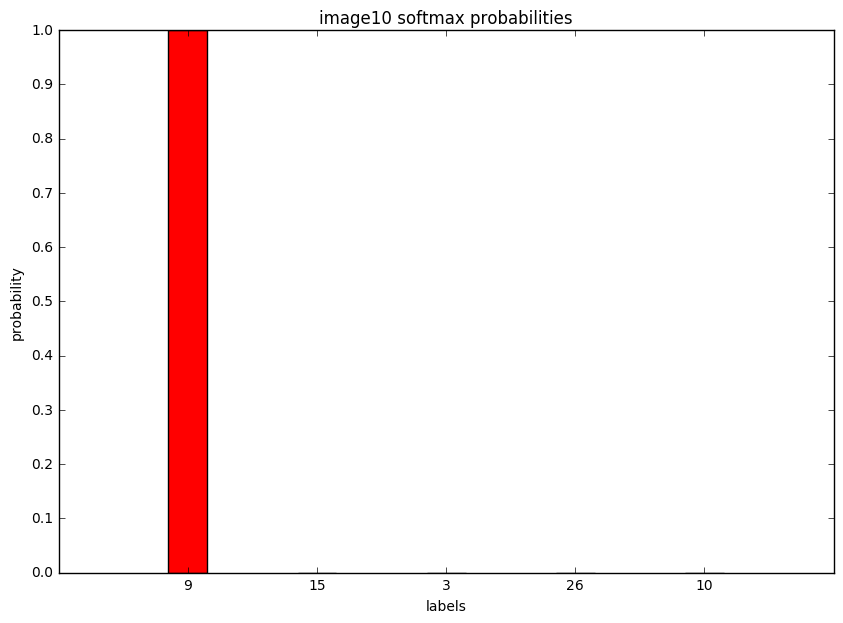

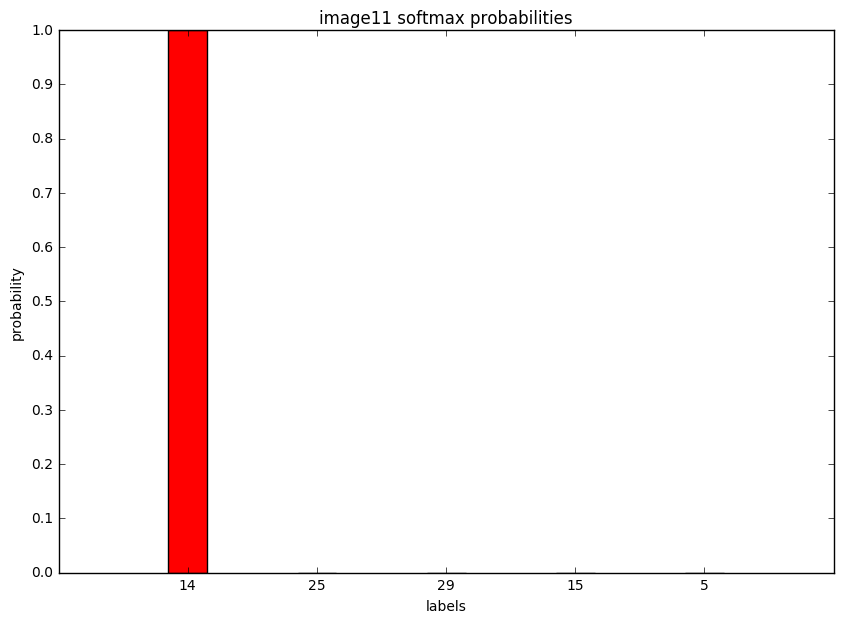

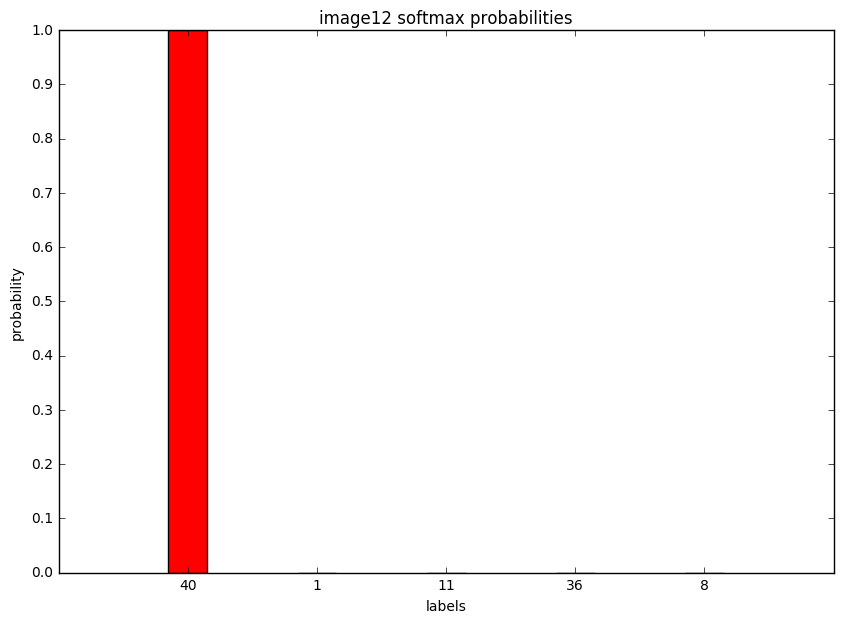

In [28]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
#saver = tf.train.Saver()
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('models/trafficSign.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    #saver.restore(sess, 'models/trafficSign.meta')
    probabilities = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: new_images, keep_prob: 1.})
    
    for i, p in enumerate(probabilities.values):
        fig, ax = plt.subplots()
        ax.bar(np.arange(5), p, 0.3, color='r', align='center')
        ax.set_xlabel('labels')
        ax.set_ylabel('probability')
        ax.set_title("image{} softmax probabilities".format(i+1))
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(0, 1.1, .1))
        ax.set_xticklabels(probabilities.indices[i])
        plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The softmax prediction plots are shown above. For the correct predictions, the probabilities seem to be very high and quite confident. For the wrong ones, in one case the probabilties are resonably close, while for the other one, they seem to be predicting a really wrong value.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.